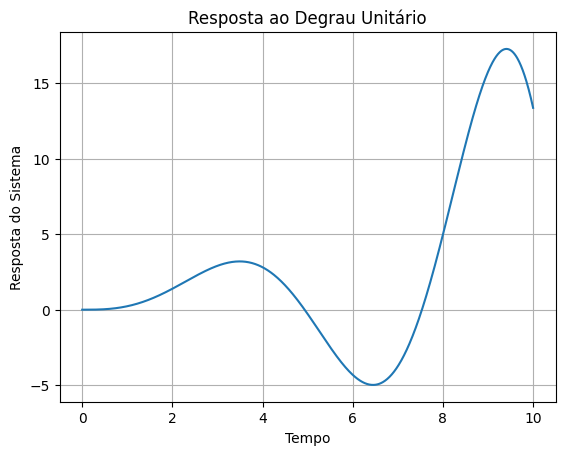

In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Definindo a função de transferência em malha aberta
numerator = [1]
denominator = [3, 2, 1, 0]
sys_open_loop = ctrl.TransferFunction(numerator, denominator)

# Projeto do controlador proporcional
Kp = 5.0
controller_transfer_function = ctrl.TransferFunction([Kp], [1])

# Criando o sistema em malha fechada
sys_closed_loop = ctrl.feedback(sys_open_loop * controller_transfer_function)

# Definindo o tempo da simulação
time = np.linspace(0, 10, 1000)

# Resposta ao degrau unitário
time, response = ctrl.step_response(sys_closed_loop, time)

# Plotando os resultados
plt.plot(time, response)
plt.xlabel('Tempo')
plt.ylabel('Resposta do Sistema')
plt.title('Resposta ao Degrau Unitário')
plt.grid(True)
plt.show()


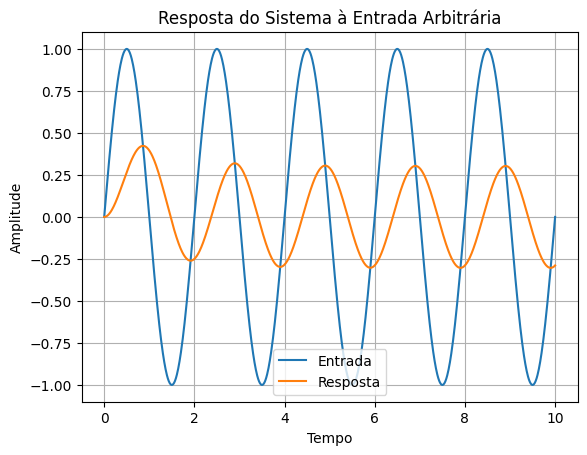

In [2]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Definindo a função de transferência em malha aberta
numerator = [1]
denominator = [1, 0]
sys_open_loop = ctrl.TransferFunction(numerator, denominator)

# Projeto do controlador proporcional
Kp = 1.0
controller_transfer_function = ctrl.TransferFunction([Kp], [1])

# Criando o sistema em malha fechada
sys_closed_loop = ctrl.feedback(sys_open_loop * controller_transfer_function)

# Definindo o tempo da simulação
time = np.linspace(0, 10, 1000)

# Criando um sinal de entrada arbitrário (por exemplo, uma onda senoidal)
input_signal = np.sin(2 * np.pi * 0.5 * time)

# Simulando a resposta do sistema à entrada arbitrária
time, response = ctrl.forced_response(sys_closed_loop, time, input_signal)

# Plotando os resultados
plt.plot(time, input_signal, label='Entrada')
plt.plot(time, response, label='Resposta')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta do Sistema à Entrada Arbitrária')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
type(sys_closed_loop)

control.xferfcn.TransferFunction

In [48]:
from model.motor import Motor, MotorDataModel
import json

In [67]:
with open("data/data_plant.json", "r") as inp:
    data = json.load(inp)

In [68]:
data

{'engines': [{'resistence': 100,
   'inductance': 1.0,
   'torque': 5,
   'inertia_moment': 18,
   'viscous_friction': 4.5,
   'electrical_constant': 7},
  {'resistence': 10,
   'inductance': 1.0,
   'torque': 50,
   'inertia_moment': 1.8,
   'viscous_friction': 4.5,
   'electrical_constant': 7},
  {'resistence': 1,
   'inductance': 1.0,
   'torque': 75,
   'inertia_moment': 0.18,
   'viscous_friction': 4.5,
   'electrical_constant': 7},
  {'resistence': 0.1,
   'inductance': 1.0,
   'torque': 100,
   'inertia_moment': 0.018,
   'viscous_friction': 4.5,
   'electrical_constant': 7}]}

In [69]:
data_model = MotorDataModel(**data['engines'][0])
data_model

MotorDataModel(resistence=100, inductance=1.0, torque=5, inertia_moment=18, viscous_friction=4.5, electrical_constant=7)

In [70]:
motor = Motor(data_model)

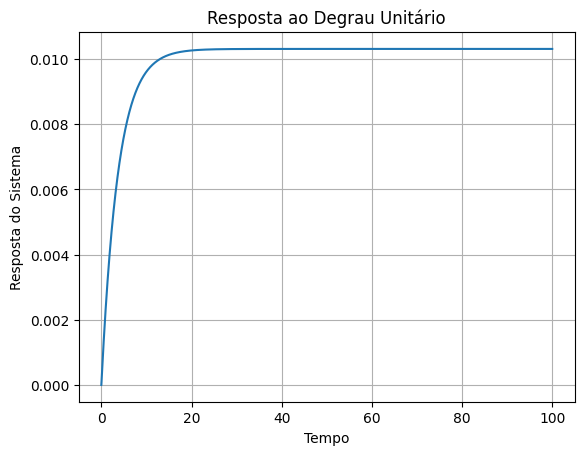

In [71]:
motor.plot_step_response(horizon=100)

In [72]:
motor.closed_loop()

TransferFunction(array([0.05]), array([ 0.18 , 18.045,  4.85 ]))

In [73]:
motor.open_loop()

TransferFunction(array([0.05]), array([ 0.18 , 18.045,  4.5  ]))

In [74]:
data_models = [MotorDataModel(**model) for model in data['engines']]
motors = [Motor(dm) for dm in data_models]

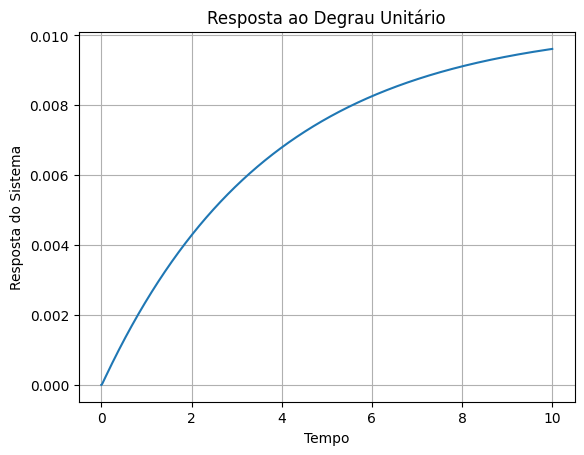

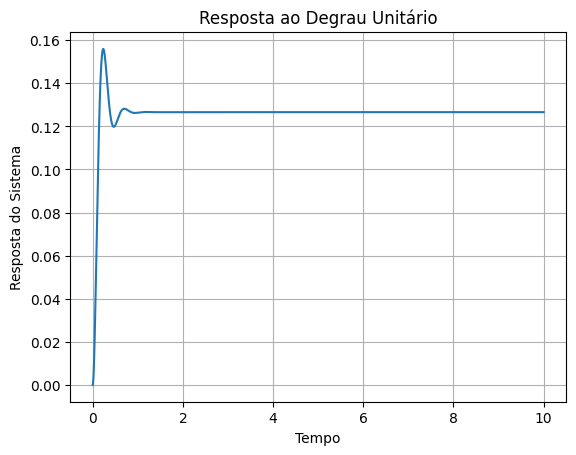

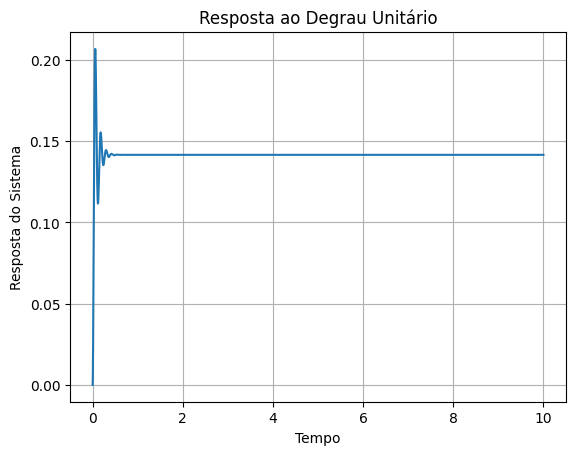

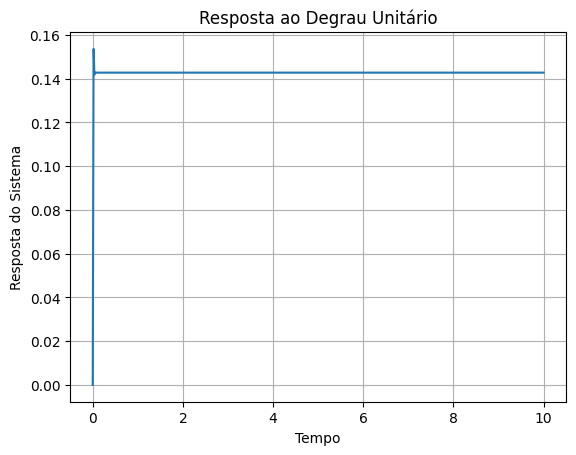

In [75]:
for motor in motors:
    motor.plot_step_response(horizon=10)

In [76]:
with open("data/data_plant.json", "r") as inp:
    data = json.load(inp)

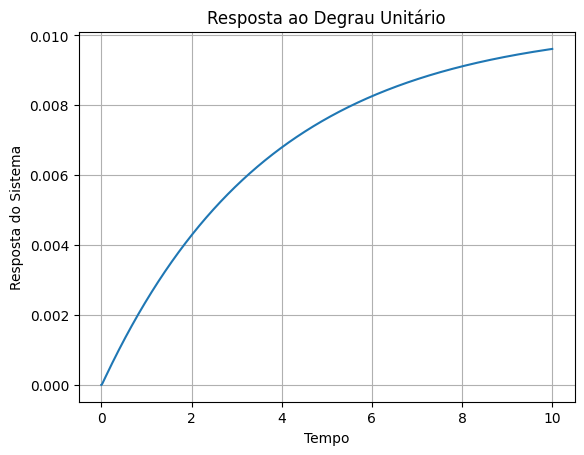

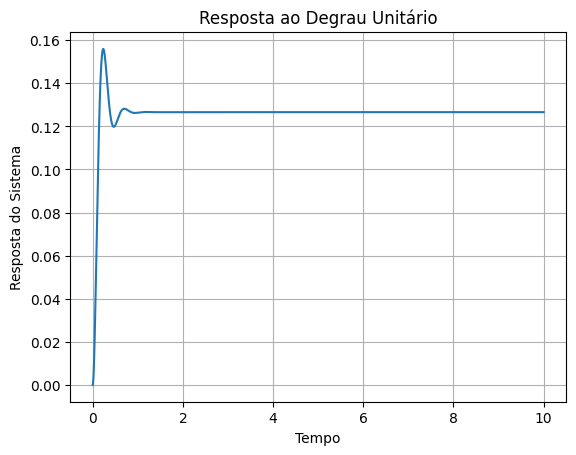

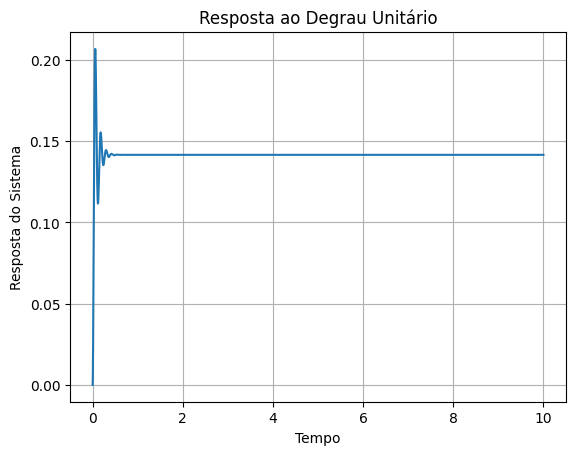

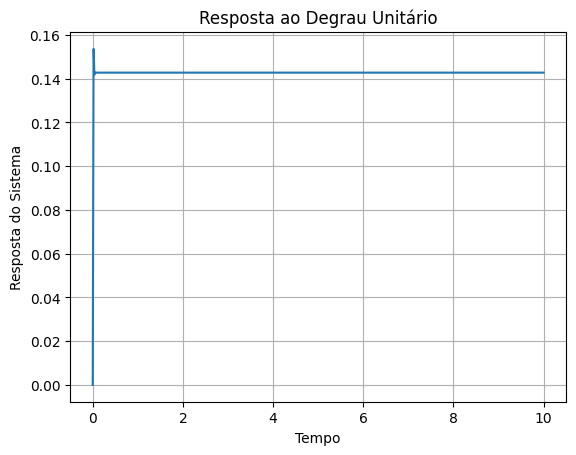

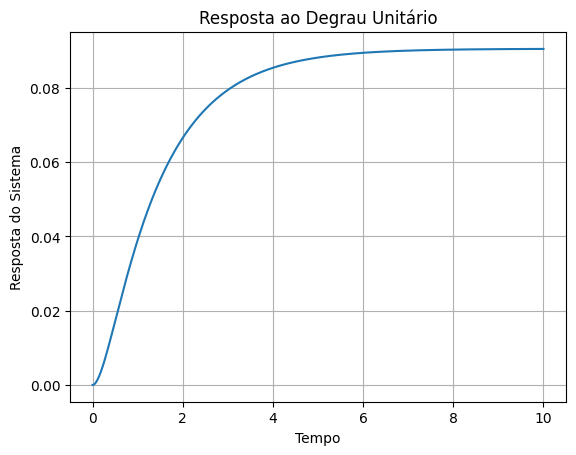

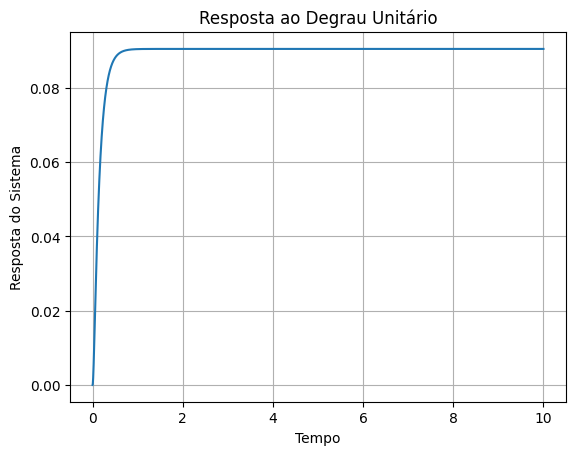

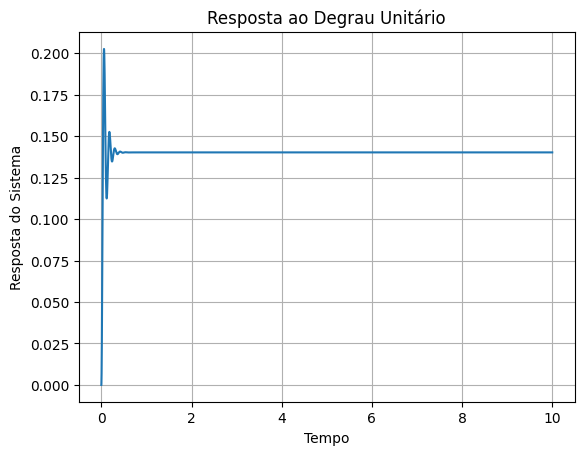

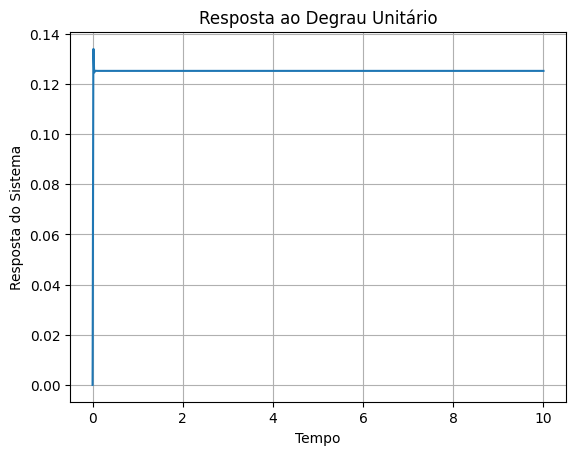

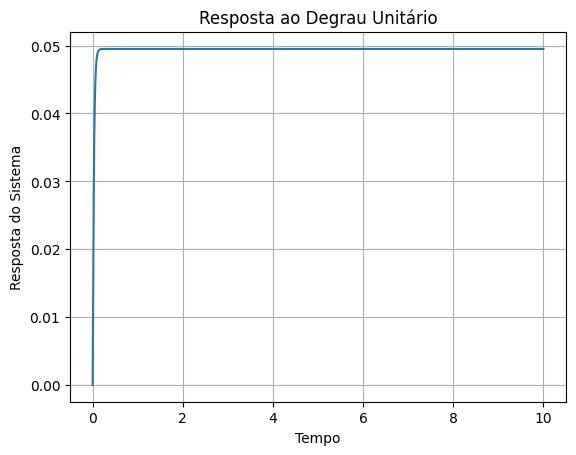

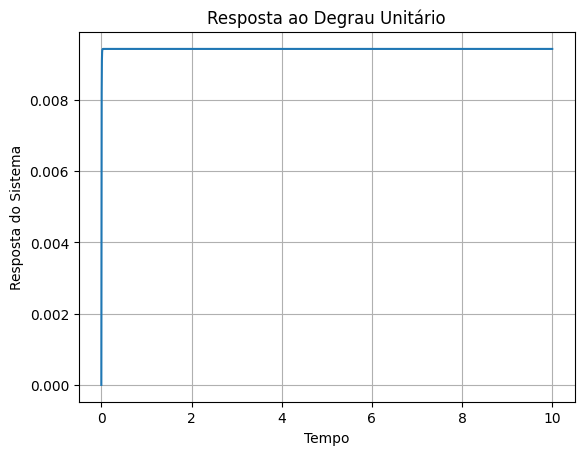

In [77]:
data_models = [MotorDataModel(**model) for model in data['engines']]
motors = [Motor(dm) for dm in data_models]

for motor in motors:
    motor.plot_step_response(horizon=10)